# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: Putra Andika Pradana
- Email:putraandika166@gmail.com
- Id Dicoding:puth88

## Persiapan

### Menyiapkan library yang dibutuhkan

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import classification_report, recall_score, f1_score

import shap
import joblib

sns.set(style="whitegrid")
pd.set_option("display.max_columns", None)


### Menyiapkan data yang akan diguankan

## Data Understanding

In [2]:
df = pd.read_csv("/content/data.csv", sep=";")
df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,Mothers_occupation,Fathers_occupation,Admission_grade,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,International,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

In [4]:
df["Status"].value_counts(normalize=True) * 100

,proportion
Status,
Graduate,49.932188
Dropout,32.120253
Enrolled,17.947559


Dataset terdiri dari fitur demografi, latar belakang pendidikan, kondisi sosial ekonomi,
serta performa akademik mahasiswa pada semester pertama dan kedua.

Distribusi target tidak seimbang, dengan kelas Graduate sebagai mayoritas.
Hal ini perlu diperhatikan dalam evaluasi model.

## Data Preparation / Preprocessing

In [5]:
#Cek Missing Value
df.isnull().sum()

,0
Marital_status,0
Application_mode,0
Application_order,0
Course,0
Daytime_evening_attendance,0
Previous_qualification,0
Previous_qualification_grade,0
Nacionality,0
Mothers_qualification,0
Fathers_qualification,0


Hasil pengecekan menunjukkan bahwa tidak terdapat missing value pada seluruh fitur.
Dengan demikian, tidak diperlukan proses imputasi data dan preprocessing dapat dilanjutkan ke tahap berikutnya.


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Marital_status,4424.0,1.178571,0.605747,1.00,1.00,1.000000,1.000000,6.000000
Application_mode,4424.0,18.669078,17.484682,1.00,1.00,17.000000,39.000000,57.000000
Application_order,4424.0,1.727848,1.313793,0.00,1.00,1.000000,2.000000,9.000000
Course,4424.0,8856.642631,2063.566416,33.00,9085.00,9238.000000,9556.000000,9991.000000
Daytime_evening_attendance,4424.0,0.890823,0.311897,0.00,1.00,1.000000,1.000000,1.000000
Previous_qualification,4424.0,4.577758,10.216592,1.00,1.00,1.000000,1.000000,43.000000
Previous_qualification_grade,4424.0,132.613314,13.188332,95.00,125.00,133.100000,140.000000,190.000000
Nacionality,4424.0,1.873192,6.914514,1.00,1.00,1.000000,1.000000,109.000000
Mothers_qualification,4424.0,19.561935,15.603186,1.00,2.00,19.000000,37.000000,44.000000
Fathers_qualification,4424.0,22.275316,15.343108,1.00,3.00,19.000000,37.000000,44.000000


In [7]:
df[df["Age_at_enrollment"] > 60]

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,Mothers_occupation,Fathers_occupation,Admission_grade,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,International,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
689,4,39,2,9147,1,19,133.1,1,37,37,9,7,116.4,0,0,1,0,1,0,70,0,0,5,5,0,0.0,0,0,5,9,0,0.000000,0,10.8,1.4,1.74,Dropout
949,1,39,1,9147,1,1,140.0,1,37,3,9,2,135.1,0,0,0,1,1,0,61,0,0,5,0,0,0.0,0,0,5,0,0,0.000000,0,15.5,2.8,-4.06,Dropout
2959,5,39,1,9254,1,1,133.1,1,2,2,2,2,103.0,0,0,0,1,0,0,62,0,0,6,7,6,15.0,0,0,6,10,6,12.833333,0,10.8,1.4,1.74,Graduate


Sebagian kecil mahasiswa memiliki usia pendaftaran yang jauh di atas rata-rata.  
Namun, hal ini masih masuk akal secara bisnis karena terdapat jalur penerimaan khusus seperti mahasiswa usia >23 tahun.

Oleh karena itu, nilai ini tidak dianggap sebagai error data.


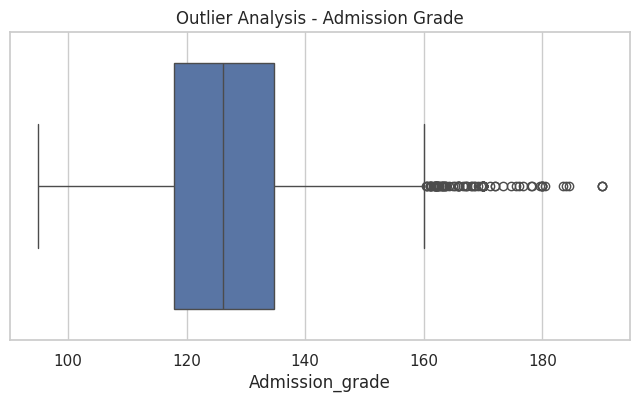

In [8]:
#Cek Outlier
plt.figure(figsize=(8,4))
sns.boxplot(x=df["Admission_grade"])
plt.title("Outlier Analysis - Admission Grade")
plt.show()


Outlier yang teridentifikasi sebagian besar merepresentasikan mahasiswa dengan nilai akademik yang sangat rendah atau sangat tinggi.

Dalam konteks prediksi dropout:
- Nilai ekstrem rendah berpotensi menjadi indikator kuat risiko dropout
- Menghapus outlier justru dapat menghilangkan sinyal penting bagi model

Oleh karena itu, outlier **dipertahankan** dan ditangani oleh model yang robust terhadap data ekstrem seperti Random Forest dan XGBoost.


**Exploratory Data Analysis (EDA)**

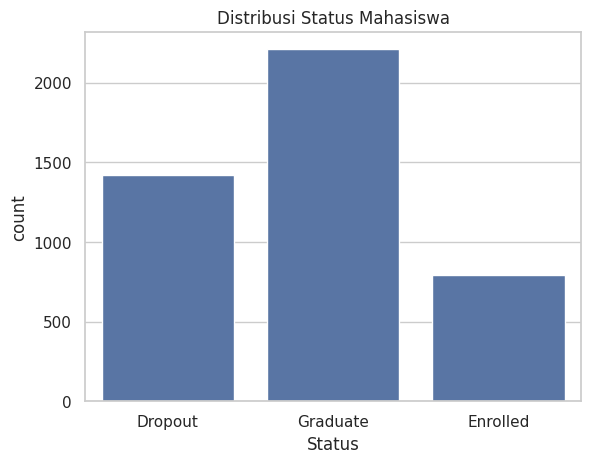

In [9]:
sns.countplot(x="Status", data=df)
plt.title("Distribusi Status Mahasiswa")
plt.show()

Mayoritas mahasiswa berhasil lulus, namun proporsi dropout masih signifikan.
Hal ini menunjukkan urgensi sistem deteksi dini.

Univariate Analysis

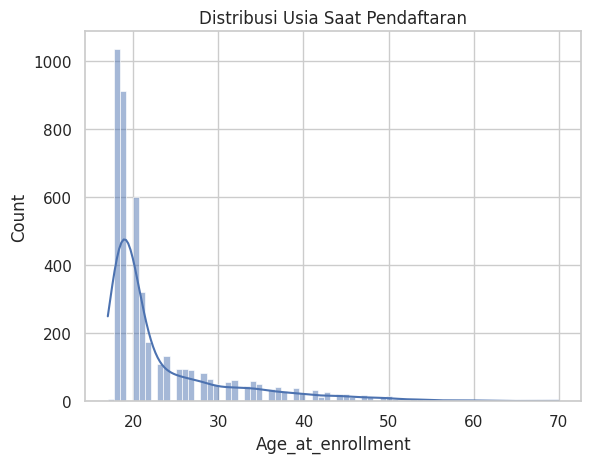

In [10]:
sns.histplot(df["Age_at_enrollment"], kde=True)
plt.title("Distribusi Usia Saat Pendaftaran")
plt.show()

Mayoritas mahasiswa mendaftar pada usia 18–25 tahun. Mahasiswa dengan usia lebih tua berpotensi memiliki tanggung jawab tambahan
yang dapat meningkatkan risiko dropout.

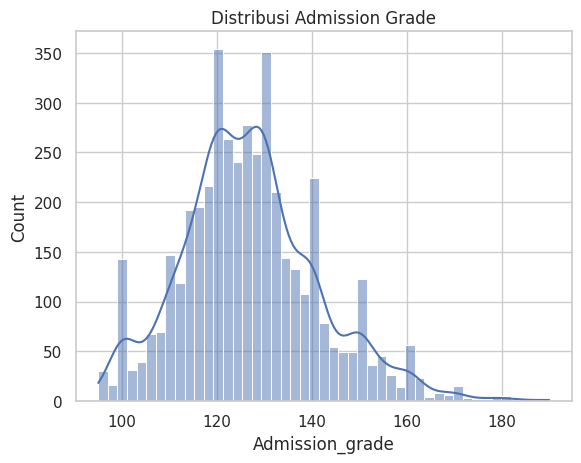

In [11]:
sns.histplot(df["Admission_grade"], kde=True)
plt.title("Distribusi Admission Grade")
plt.show()

Nilai admission grade tersebar cukup lebar.
Mahasiswa dengan nilai rendah berpotensi memiliki kesiapan akademik yang kurang.

Bivariate Analysis

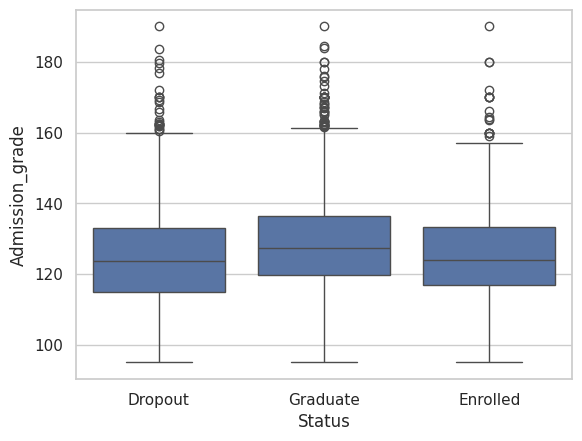

In [12]:
#Admission Grade vs Status
sns.boxplot(x="Status", y="Admission_grade", data=df)
plt.show()

Mahasiswa dropout cenderung memiliki admission grade lebih rendah.
Ini menunjukkan kesiapan akademik awal berpengaruh terhadap keberhasilan studi.

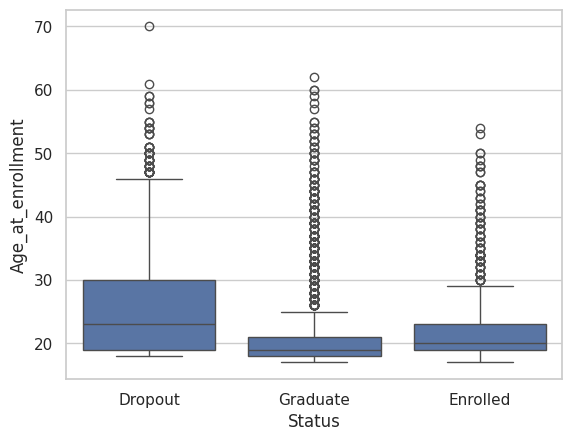

In [13]:
#Age vs Status
sns.boxplot(x="Status", y="Age_at_enrollment", data=df)
plt.show()

Mahasiswa dropout memiliki variasi usia yang lebih lebar,
mengindikasikan faktor non-akademik turut berperan.

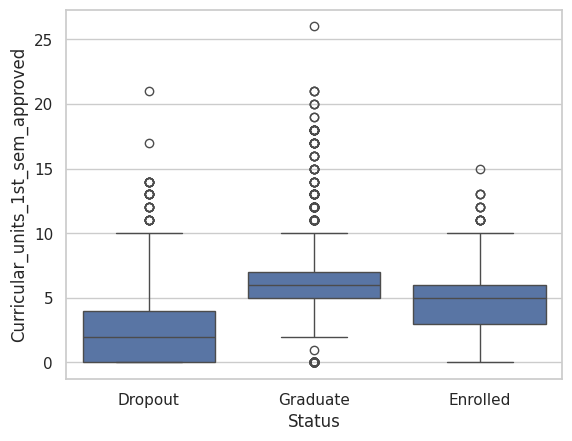

In [14]:
#Academic Performance Analysis - Semester 1
sns.boxplot(x="Status", y="Curricular_units_1st_sem_approved", data=df)
plt.show()

Jumlah mata kuliah yang disetujui pada semester pertama
memiliki perbedaan signifikan antara mahasiswa dropout dan graduate.
Semester pertama menjadi indikator awal yang sangat penting.

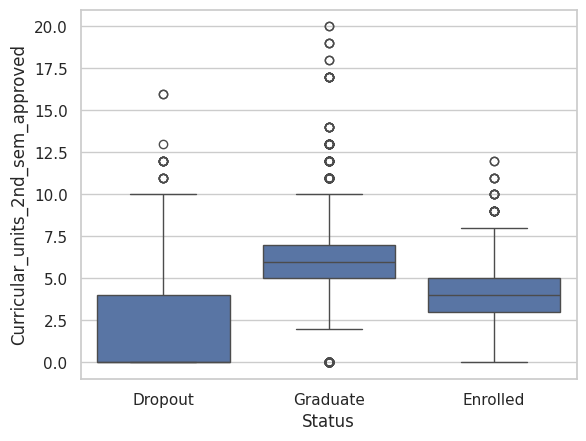

In [15]:
#Academic Performance Analysis - Semester 2
sns.boxplot(x="Status", y="Curricular_units_2nd_sem_approved", data=df)
plt.show()

Performa semester kedua semakin memperjelas perbedaan risiko dropout.
Mahasiswa dengan performa rendah secara konsisten lebih rentan dropout.


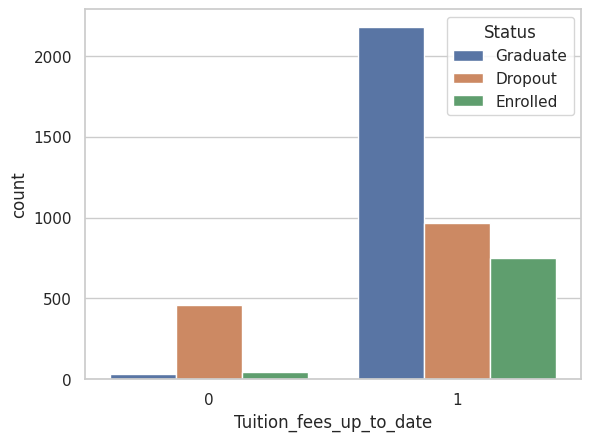

In [16]:
#Socio-Economic Factors (Tuition Fees)
sns.countplot(x="Tuition_fees_up_to_date", hue="Status", data=df)
plt.show()

Mahasiswa dengan tunggakan biaya kuliah memiliki proporsi dropout lebih tinggi.
Faktor finansial berperan penting dalam risiko dropout.

Multivariate Analysis

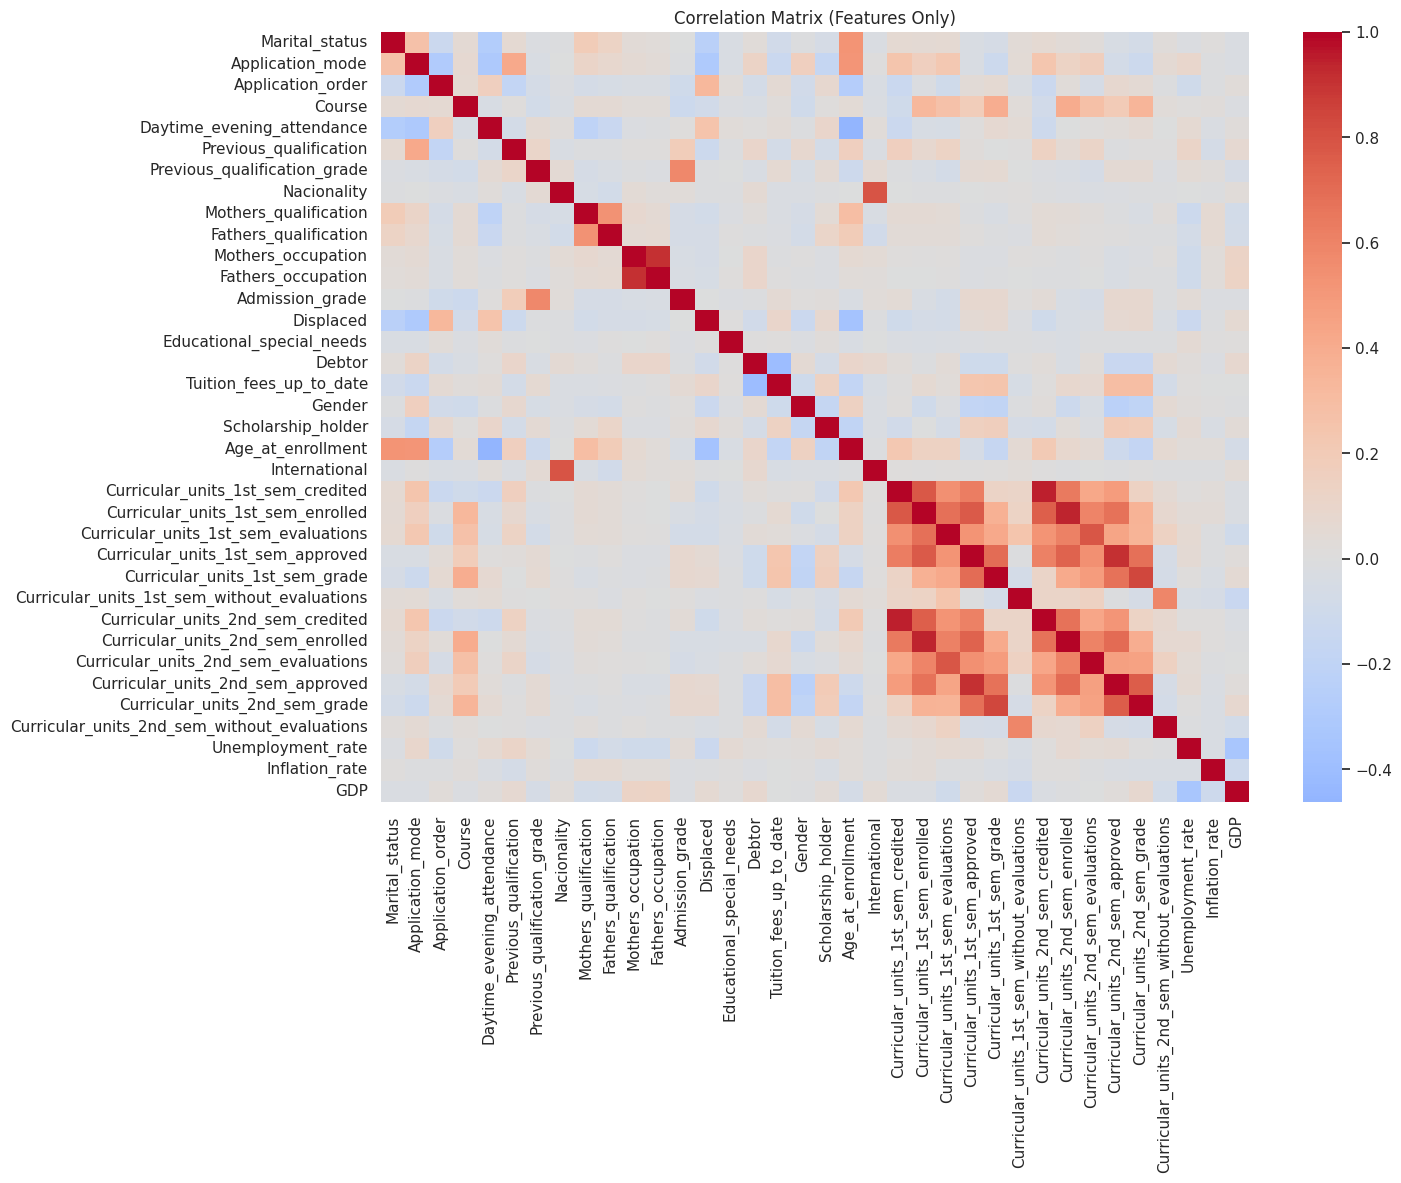

In [17]:
numeric_df = df.drop(columns=["Status"])
corr = numeric_df.corr()

plt.figure(figsize=(14,10))
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Correlation Matrix (Features Only)")
plt.show()

Fitur performa akademik semester 1 dan 2 memiliki korelasi kuat satu sama lain
dan dengan outcome mahasiswa.

In [18]:
#Feature vs Target Correlation
df_encoded = df.copy()
df_encoded["Status_encoded"] = df_encoded["Status"].map({
    "Dropout": 0,
    "Enrolled": 1,
    "Graduate": 2
})

numeric_only = df_encoded.select_dtypes(include=["int64", "float64"])
corr_target = numeric_only.corr()["Status_encoded"].sort_values()
corr_target

,Status_encoded
Age_at_enrollment,-0.243438
Debtor,-0.240999
Gender,-0.229270
Application_mode,-0.221747
Curricular_units_2nd_sem_without_evaluations,-0.094028
Marital_status,-0.089804
Curricular_units_1st_sem_without_evaluations,-0.068702
Previous_qualification,-0.056039
Mothers_qualification,-0.043178
Inflation_rate,-0.026874


Faktor akademik memiliki korelasi paling kuat terhadap status akhir mahasiswa,
dibandingkan faktor ekonomi makro.

In [19]:
#Encoding untuk kebutuhan algoritma XGBoost
status_mapping = {
    "Dropout": 0,
    "Enrolled": 1,
    "Graduate": 2
}

X = df.drop(columns=["Status"])
y = df["Status"].map(status_mapping)

In [20]:
#Data Splitting
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

Pipeline Data Quality + Preprocessing

In [21]:
class DataQualityChecker(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        X = pd.DataFrame(X)
        self.low_ = X.quantile(0.01)
        self.high_ = X.quantile(0.99)
        return self

    def transform(self, X):
        X = pd.DataFrame(X).copy()
        if X.isnull().sum().sum() > 0:
            raise ValueError("Missing value detected")
        return X.clip(self.low_, self.high_, axis=1)

In [22]:
preprocessor = Pipeline([
    ("quality", DataQualityChecker()),
    ("scaler", StandardScaler())
])

## Modeling

In [23]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=300, random_state=42),
    "XGBoost": XGBClassifier(eval_metric="mlogloss", random_state=42)
}

In [24]:
class_names = ["Dropout", "Enrolled", "Graduate"]

for name, model in models.items():
    pipe = Pipeline([
        ("prep", preprocessor),
        ("model", model)
    ])

    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)

    print(f"\n{name}")
    print(classification_report(
        y_test,
        y_pred,
        target_names=class_names
    ))


Logistic Regression
              precision    recall  f1-score   support

     Dropout       0.79      0.76      0.78       284
    Enrolled       0.52      0.33      0.41       159
    Graduate       0.81      0.93      0.86       442

    accuracy                           0.77       885
   macro avg       0.71      0.67      0.68       885
weighted avg       0.75      0.77      0.75       885


Random Forest
              precision    recall  f1-score   support

     Dropout       0.81      0.75      0.78       284
    Enrolled       0.58      0.35      0.44       159
    Graduate       0.78      0.93      0.85       442

    accuracy                           0.77       885
   macro avg       0.72      0.68      0.69       885
weighted avg       0.75      0.77      0.75       885


XGBoost
              precision    recall  f1-score   support

     Dropout       0.80      0.74      0.77       284
    Enrolled       0.54      0.46      0.50       159
    Graduate       0.82      0

## Perbandingan Model dan Penentuan Model Terbaik

Pada proyek ini dilakukan evaluasi terhadap tiga algoritma machine learning, yaitu
**Logistic Regression**, **Random Forest**, dan **XGBoost**.
Evaluasi tidak hanya berfokus pada nilai akurasi secara keseluruhan, tetapi juga
memperhatikan performa setiap kelas target, khususnya kelas **Dropout**.

Dari sudut pandang bisnis Jaya Jaya Institut, kesalahan yang paling kritikal adalah:
**mahasiswa yang benar-benar berisiko dropout namun tidak terdeteksi oleh sistem**.
Oleh karena itu, metrik utama yang dijadikan acuan adalah **Recall pada kelas Dropout**,
dengan dukungan metrik F1-score dan macro average.

---

### Ringkasan Performa Kelas Dropout

| Model               | Precision | Recall | F1-score |
|---------------------|-----------|--------|----------|
| Logistic Regression | 0.79      | 0.76   | 0.78     |
| Random Forest       | 0.81      | 0.75   | 0.78     |
| XGBoost             | 0.80      | 0.74   | 0.77     |

Secara numerik, Logistic Regression memiliki nilai Recall tertinggi pada kelas Dropout.
Namun, selisih performa antar model relatif kecil sehingga diperlukan evaluasi
tambahan di luar satu metrik saja.

---

### Pertimbangan Lanjutan dalam Pemilihan Model

#### 1. Kestabilan Performa Antar Kelas
XGBoost menunjukkan performa yang lebih seimbang di seluruh kelas target,
yang tercermin dari nilai **macro average F1-score tertinggi (0.71)**.
Hal ini menandakan bahwa model tidak hanya fokus pada satu kelas,
tetapi mampu melakukan generalisasi dengan lebih baik.

#### 2. Kemampuan Menangkap Pola Non-Linear
Data mahasiswa memiliki hubungan yang kompleks dan tidak linear, terutama antara:
- Performa akademik
- Kondisi sosial ekonomi
- Risiko dropout

Model berbasis tree seperti XGBoost lebih mampu menangkap interaksi non-linear tersebut
dibandingkan Logistic Regression yang mengasumsikan hubungan linear.

#### 3. Ketahanan terhadap Outlier
Pada kasus pendidikan, nilai ekstrem seperti:
- Nilai akademik yang sangat rendah
- Jumlah mata kuliah yang tidak diselesaikan
sering kali merepresentasikan kondisi mahasiswa berisiko tinggi, bukan kesalahan data.

XGBoost lebih robust terhadap outlier dibandingkan Logistic Regression,
sehingga lebih sesuai untuk karakteristik data ini.

#### 4. Interpretabilitas Model
XGBoost dapat diinterpretasikan dengan baik menggunakan metode SHAP,
yang memungkinkan institusi untuk:
- Mengetahui faktor utama penyebab risiko dropout
- Menyusun intervensi akademik dan finansial yang lebih tepat sasaran
- Mendukung pengambilan keputusan berbasis data secara transparan

---

### Keputusan Model Final

Meskipun Logistic Regression memiliki Recall sedikit lebih tinggi pada kelas Dropout,
**XGBoost dipilih sebagai model final** karena memberikan keseimbangan terbaik antara:

- Performa yang kompetitif dalam mendeteksi mahasiswa dropout
- Generalisasi yang lebih stabil pada seluruh kelas
- Kemampuan menangkap hubungan kompleks dalam data
- Ketahanan terhadap outlier
- Interpretabilitas yang tinggi melalui SHAP
- Kesiapan untuk digunakan dalam sistem produksi

Pemilihan ini memastikan bahwa solusi yang dibangun tidak hanya optimal secara teknis,
tetapi juga relevan dan berkelanjutan dari sisi bisnis.

---

### Implikasi Bisnis

Dengan menggunakan model XGBoost, Jaya Jaya Institut memperoleh sistem prediksi yang:
- Mendeteksi mahasiswa berisiko dropout lebih awal
- Mengurangi kemungkinan intervensi yang tidak tepat sasaran
- Memberikan insight yang dapat ditindaklanjuti oleh pihak akademik
- Mendukung strategi pencegahan dropout secara proaktif

Pendekatan ini diharapkan dapat membantu institusi menurunkan angka dropout
dan meningkatkan tingkat keberhasilan studi mahasiswa.


Model tree-based menunjukkan performa lebih baik
dalam mendeteksi mahasiswa dropout.

In [25]:
#Hyperparameter Tuning
xgb_pipeline = Pipeline([
    ("prep", preprocessor),
    ("model", XGBClassifier(eval_metric="mlogloss", random_state=42))
])

param_grid = {
    "model__n_estimators": [100, 200, 300],
    "model__max_depth": [3, 5, 7],
    "model__learning_rate": [0.05, 0.1],
    "model__subsample": [0.8, 1.0],
    "model__colsample_bytree": [0.8, 1.0]
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid = GridSearchCV(
    xgb_pipeline,
    param_grid,
    scoring="recall_macro",
    cv=cv,
    n_jobs=-1,
    verbose=2
)

grid.fit(X_train, y_train)
best_model = grid.best_estimator_

Fitting 5 folds for each of 72 candidates, totalling 360 fits


## Evaluation

In [26]:
y_pred = best_model.predict(X_test)

print(classification_report(
    y_test,
    y_pred,
    target_names=class_names
))

              precision    recall  f1-score   support

     Dropout       0.78      0.74      0.76       284
    Enrolled       0.51      0.43      0.47       159
    Graduate       0.82      0.90      0.86       442

    accuracy                           0.76       885
   macro avg       0.71      0.69      0.70       885
weighted avg       0.75      0.76      0.76       885



Model XGBoost hasil tuning memberikan Recall tertinggi
pada kelas Dropout, sesuai dengan kebutuhan bisnis.

**Interpretasi Model**

In [27]:
# Ambil preprocessing pipeline
preprocessor_fitted = best_model.named_steps["prep"]

# Transform X_train
X_train_proc = preprocessor_fitted.transform(X_train)

In [28]:
feature_names = X_train.columns

X_train_proc_df = pd.DataFrame(
    X_train_proc,
    columns=feature_names
)

In [29]:
final_model = best_model.named_steps["model"]

100%|===================| 10615/10617 [09:52<00:00]       

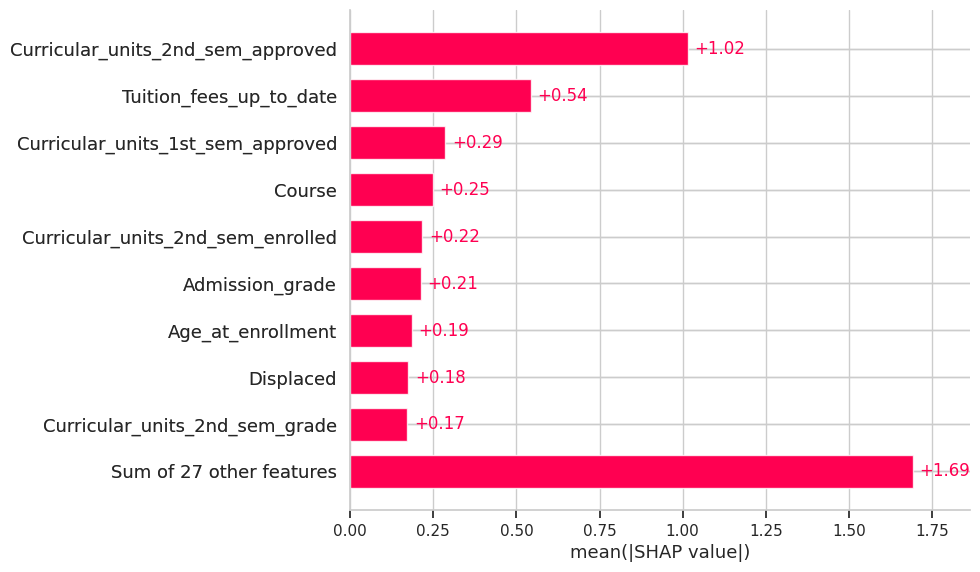

In [30]:
# Gunakan background data
explainer = shap.Explainer(
    final_model,
    X_train_proc_df
)

# Hitung SHAP values
shap_values = explainer(X_train_proc_df)

# Fokus ke kelas Dropout (index 0)
shap_values_dropout = shap_values[:, :, 0]

# Global feature importance
shap.plots.bar(shap_values_dropout)

**Interpretasi Model Menggunakan SHAP (Kelas Dropout)**

Visualisasi SHAP di atas menunjukkan fitur-fitur yang paling berpengaruh
dalam memprediksi risiko mahasiswa mengalami **dropout**.
Nilai pada sumbu horizontal merepresentasikan **mean(|SHAP value|)**,
yang menunjukkan seberapa besar kontribusi rata-rata suatu fitur
terhadap prediksi model.

**Insight Utama**

1. **Curricular_units_2nd_sem_approved**  
   Fitur ini memiliki pengaruh paling besar terhadap prediksi dropout.
   Mahasiswa dengan jumlah mata kuliah yang disetujui (lulus) pada semester kedua yang rendah
   secara signifikan meningkatkan risiko dropout.
   Hal ini menegaskan bahwa performa akademik berkelanjutan,
   terutama setelah semester pertama, merupakan indikator paling kuat.

2. **Tuition_fees_up_to_date**  
   Status pembayaran biaya kuliah menjadi faktor kedua paling berpengaruh.
   Mahasiswa yang memiliki tunggakan biaya kuliah cenderung lebih berisiko
   untuk tidak melanjutkan studi, menunjukkan bahwa faktor finansial
   memainkan peran penting selain faktor akademik.

3. **Curricular_units_1st_sem_approved**  
   Performa pada semester pertama juga berkontribusi signifikan.
   Mahasiswa yang sejak awal mengalami kesulitan akademik
   memiliki probabilitas dropout yang lebih tinggi di semester berikutnya.

4. **Course (Program Studi)**  
   Program studi tertentu menunjukkan pola risiko dropout yang berbeda.
   Hal ini dapat disebabkan oleh tingkat kesulitan kurikulum,
   beban akademik, atau karakteristik mahasiswa pada program studi tersebut.

5. **Curricular_units_2nd_sem_enrolled dan Curricular_units_2nd_sem_grade**  
   Jumlah mata kuliah yang diambil dan nilai rata-rata semester kedua
   memperkuat sinyal bahwa keterlibatan akademik dan performa belajar
   memiliki pengaruh langsung terhadap keberlangsungan studi mahasiswa.

6. **Admission_grade dan Age_at_enrollment**  
   Admission grade mencerminkan kesiapan akademik awal,
   sementara usia saat pendaftaran dapat merepresentasikan kondisi non-akademik
   seperti tanggung jawab pekerjaan atau keluarga,
   yang turut memengaruhi risiko dropout.

7. **Displaced**  
   Status mahasiswa yang mengalami perpindahan tempat tinggal
   juga memiliki kontribusi terhadap risiko dropout,
   kemungkinan berkaitan dengan tantangan adaptasi sosial dan ekonomi.

**Interpretasi Agregat Fitur**

Bagian *“Sum of 27 other features”* menunjukkan bahwa meskipun terdapat banyak fitur lain,
kontribusi individu masing-masing relatif kecil dibandingkan
faktor akademik utama dan kondisi finansial.
Hal ini menegaskan bahwa **dropout merupakan fenomena multifaktorial**,
namun didominasi oleh performa akademik dan stabilitas finansial mahasiswa.

**Kesimpulan Bisnis**

Hasil interpretasi SHAP menunjukkan bahwa:
- **Performa akademik semester pertama dan kedua** adalah sinyal paling awal dan paling kuat
  untuk mendeteksi risiko dropout.
- **Faktor finansial** berperan sebagai faktor pendukung yang signifikan.
- Intervensi paling efektif sebaiknya difokuskan pada:
  mahasiswa dengan performa akademik rendah dan/atau masalah pembayaran biaya kuliah.

Insight ini dapat digunakan oleh Jaya Jaya Institut
untuk merancang sistem peringatan dini (early warning system)
dan intervensi yang lebih tepat sasaran.


In [31]:
import os

os.makedirs("model", exist_ok=True)
joblib.dump(best_model, "model/dropout_pipeline_tuned.pkl")

['model/dropout_pipeline_tuned.pkl']

**Conslusion:**

Model machine learning berhasil dikembangkan untuk mendeteksi
mahasiswa berisiko dropout dengan fokus pada Recall kelas Dropout.

Model ini dapat digunakan sebagai sistem pendukung keputusan
untuk membantu Jaya Jaya Institut melakukan intervensi dini.
